First, we initialize the dataset and remove any ineligible matches (ie. training matches)

In [166]:
import pandas as pd
import numpy as np
df = pd.read_csv('TT.txt', quotechar='"', skipinitialspace = True)

df = df[(df['mode'] != 'Seed') & (df['mode'] != 'Grounds') & (df['mode'] != 'Training')]
df['Timestamp'] = pd.to_datetime(df['datetime_utc'])
df = df.set_index('Timestamp')


Then, we generate the charts...

NOTE:
If you want the datasets for each graph, you can simply print the dataframe being returned like the example below...
- Just remember to change the function name :p

```python
res = get_win_rate()
print(res)
```

,faction,winning_count,losing_count,total_games,win_rate
0,Russian Ground Forces,204,240,444,45.945946
1,United States Army,115,111,226,50.884956
2,United States Marine Corps,86,69,155,55.483871
3,Middle Eastern Alliance,70,80,150,46.666667
4,Canadian Army,48,61,109,44.036697
5,Australian Defence Force,46,26,72,63.888889
6,British Army,38,36,74,51.351351
7,Irregular Militia Forces,25,17,42,59.523810
8,Insurgent Forces,20,12,32,62.500000


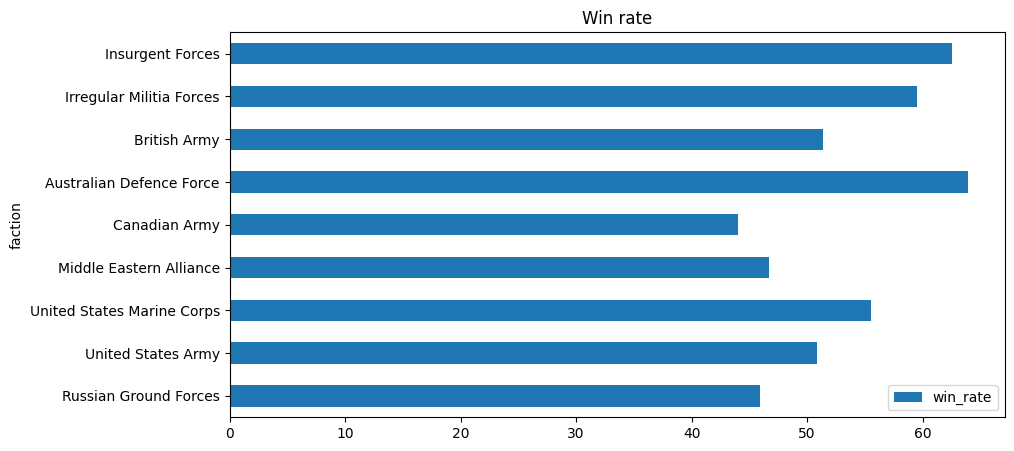

In [167]:
def get_win_rate(df):
    # winner_faction / (winner_faction + loser_faction)
    winners = df['winner_faction'].value_counts().reset_index()
    losers = df['loser_faction'].value_counts().reset_index()
    winners.columns = ['faction', 'winning_count']
    losers.columns = ['faction', 'losing_count']
    
    df = pd.merge(winners, losers, left_on='faction', right_on='faction', how='outer').fillna(0)
    df['total_games'] = df['winning_count'] + df['losing_count']
    df['win_rate'] = df['winning_count'] * 100.000 / df['total_games']
    
    ax = df.plot(kind='barh', x='faction', y='win_rate', figsize=(10, 5))
    ax.set_title('Win rate')

    return df

get_win_rate(df)

In [181]:
def played_per_week(df, column, timesampled, title):
    df = df.resample(timesampled)[column].value_counts().to_frame('counts').reset_index()
    df = df.pivot(index='Timestamp', columns=column, values='counts').fillna(0)
    ax = df.plot(figsize=(10, 5))
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    ax.set_title(title)

    return df

level,Al Basrah,Anvil,Belaya Pass,Black Coast,Chora,Fallujah,Fool's Road,Goose Bay,Gorodok,Kamdesh Highlands,...,Lashkar Valley,Logar Valley,Manic-5,Mestia,Mutaha,Narva,Skorpo,Sumari Bala,Tallil Outskirts,Yehorivka
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-02,0.0,0.0,3.0,5.0,2.0,3.0,1.0,2.0,4.0,1.0,...,1.0,2.0,1.0,0.0,5.0,6.0,1.0,3.0,0.0,2.0
2022-10-09,4.0,2.0,5.0,16.0,12.0,12.0,6.0,4.0,14.0,1.0,...,3.0,1.0,1.0,2.0,18.0,18.0,4.0,5.0,0.0,15.0
2022-10-16,5.0,1.0,7.0,11.0,8.0,7.0,4.0,5.0,16.0,4.0,...,2.0,1.0,1.0,5.0,13.0,14.0,5.0,7.0,4.0,17.0
2022-10-23,4.0,2.0,6.0,10.0,11.0,8.0,5.0,2.0,12.0,6.0,...,2.0,2.0,3.0,1.0,16.0,19.0,3.0,6.0,2.0,15.0
2022-10-30,3.0,2.0,6.0,10.0,8.0,7.0,5.0,5.0,8.0,4.0,...,3.0,1.0,1.0,2.0,13.0,15.0,4.0,4.0,2.0,12.0
2022-11-06,1.0,0.0,1.0,1.0,1.0,3.0,2.0,1.0,4.0,0.0,...,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0


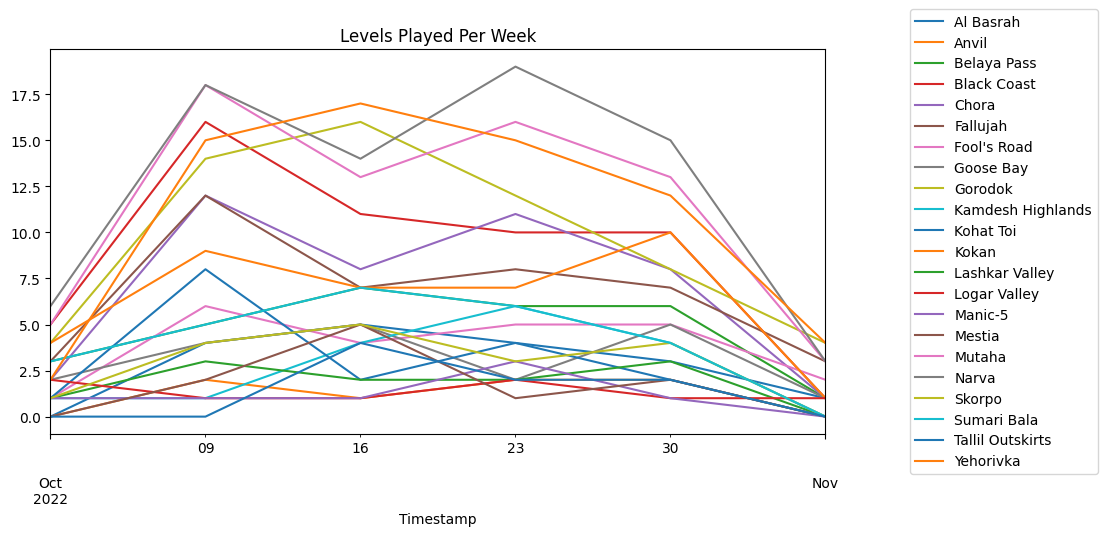

In [182]:
played_per_week(df, 'level', 'W', 'Levels Played Per Week')

level,Al Basrah,Anvil,Belaya Pass,Black Coast,Chora,Fallujah,Fool's Road,Goose Bay,Gorodok,Kamdesh Highlands,...,Lashkar Valley,Logar Valley,Manic-5,Mestia,Mutaha,Narva,Skorpo,Sumari Bala,Tallil Outskirts,Yehorivka
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-31,17.0,7.0,27.0,52.0,42.0,38.0,22.0,18.0,57.0,16.0,...,11.0,8.0,7.0,10.0,67.0,74.0,17.0,25.0,8.0,63.0
2022-11-30,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


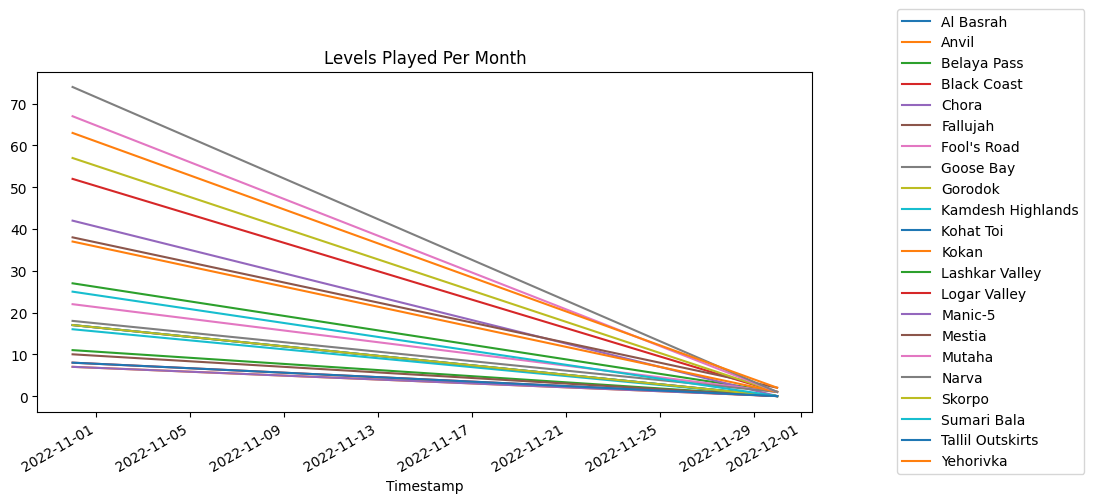

In [183]:
played_per_week(df, 'level', 'M', 'Levels Played Per Month')

mode,AAS,Invasion,RAAS,Skirmish,TC
Timestamp,,,,,
2022-10-02,13.0,2.0,30.0,0.0,2.0
2022-10-09,52.0,14.0,89.0,0.0,5.0
2022-10-16,53.0,10.0,80.0,1.0,2.0
2022-10-23,54.0,4.0,78.0,1.0,9.0
2022-10-30,32.0,7.0,83.0,2.0,3.0
2022-11-06,4.0,3.0,19.0,0.0,0.0


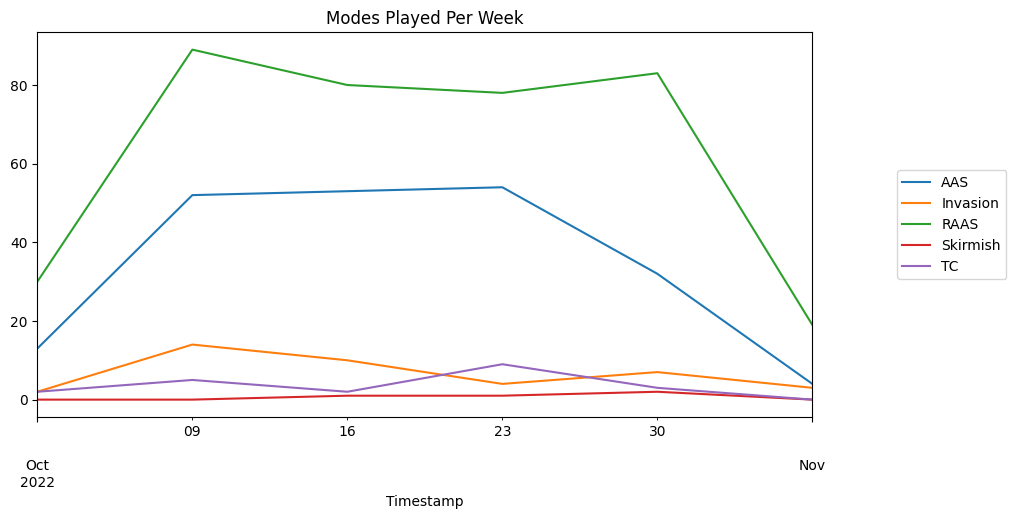

In [184]:
played_per_week(df, 'mode', 'W', 'Modes Played Per Week')

mode,AAS,Invasion,RAAS,Skirmish,TC
Timestamp,,,,,
2022-10-31,208.0,39.0,368.0,4.0,21.0
2022-11-30,0.0,1.0,11.0,0.0,0.0


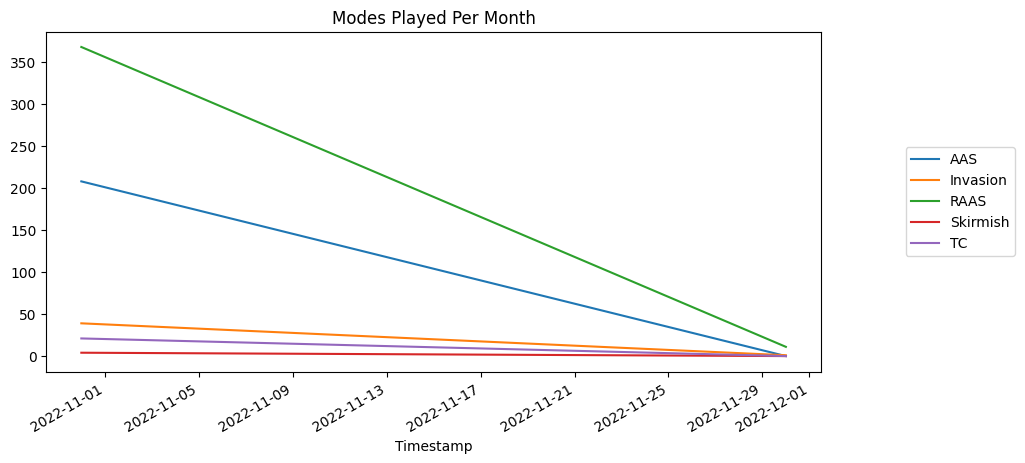

In [185]:
played_per_week(df, 'mode', 'M', 'Modes Played Per Month')

In [212]:
# (under 100, 101-150, 151-200, 200+)
def add_winner_tickets_bucket(df):
    conditions = [
        (df['winner_tickets'] <= 100),
        (101 <= df['winner_tickets']) & (df['winner_tickets'] <= 150),
        (151 <= df['winner_tickets']) & (df['winner_tickets'] <= 200),
        (200 < df['winner_tickets'])]
    choices = ['A under 100', 'B 101-150', 'C 151-200', 'D 200+'] # we add ABCD for sort
    df['winner_tickets_bucket'] = np.select(conditions, choices, default='unspecified')

    return df

In [249]:
# number of mode/levels/layers per bucket of tickets (under 100, 101-150, 151-200, 200+)
def num_per_winner_ticket_bucket(df, column, title, figsize):
    df = add_winner_tickets_bucket(df)

    df = df.groupby(['winner_tickets_bucket'], as_index=False)[column].value_counts()
    df['winner_tickets_bucket'] = df['winner_tickets_bucket'].replace('^[ABCD] ', '', regex=True)

    xaxisstr = f'winner_tickets_{column}'
    df[xaxisstr] = df['winner_tickets_bucket'] + ' ' + df[column]

    ax = df.plot(x=xaxisstr, y=['count'], kind='barh', figsize=figsize)
    ax.set_title(title)
    

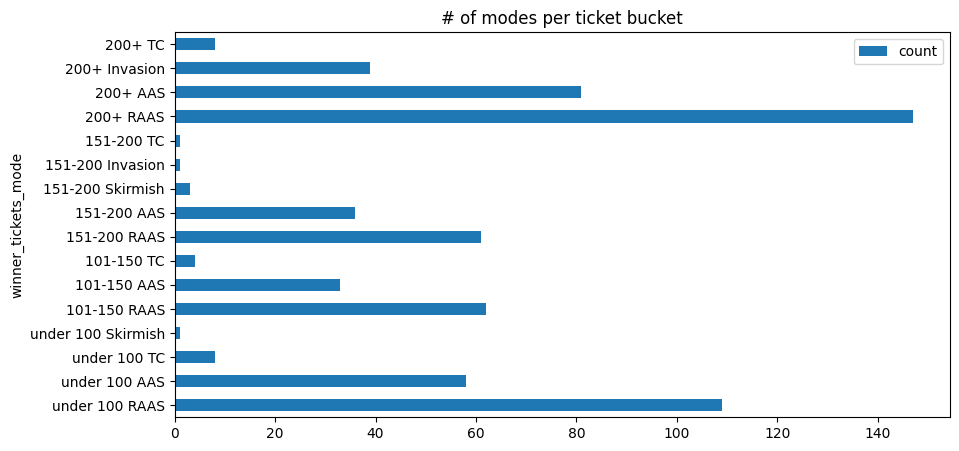

In [250]:
num_per_winner_ticket_bucket(df, 'mode', '# of modes per ticket bucket', (10, 5))

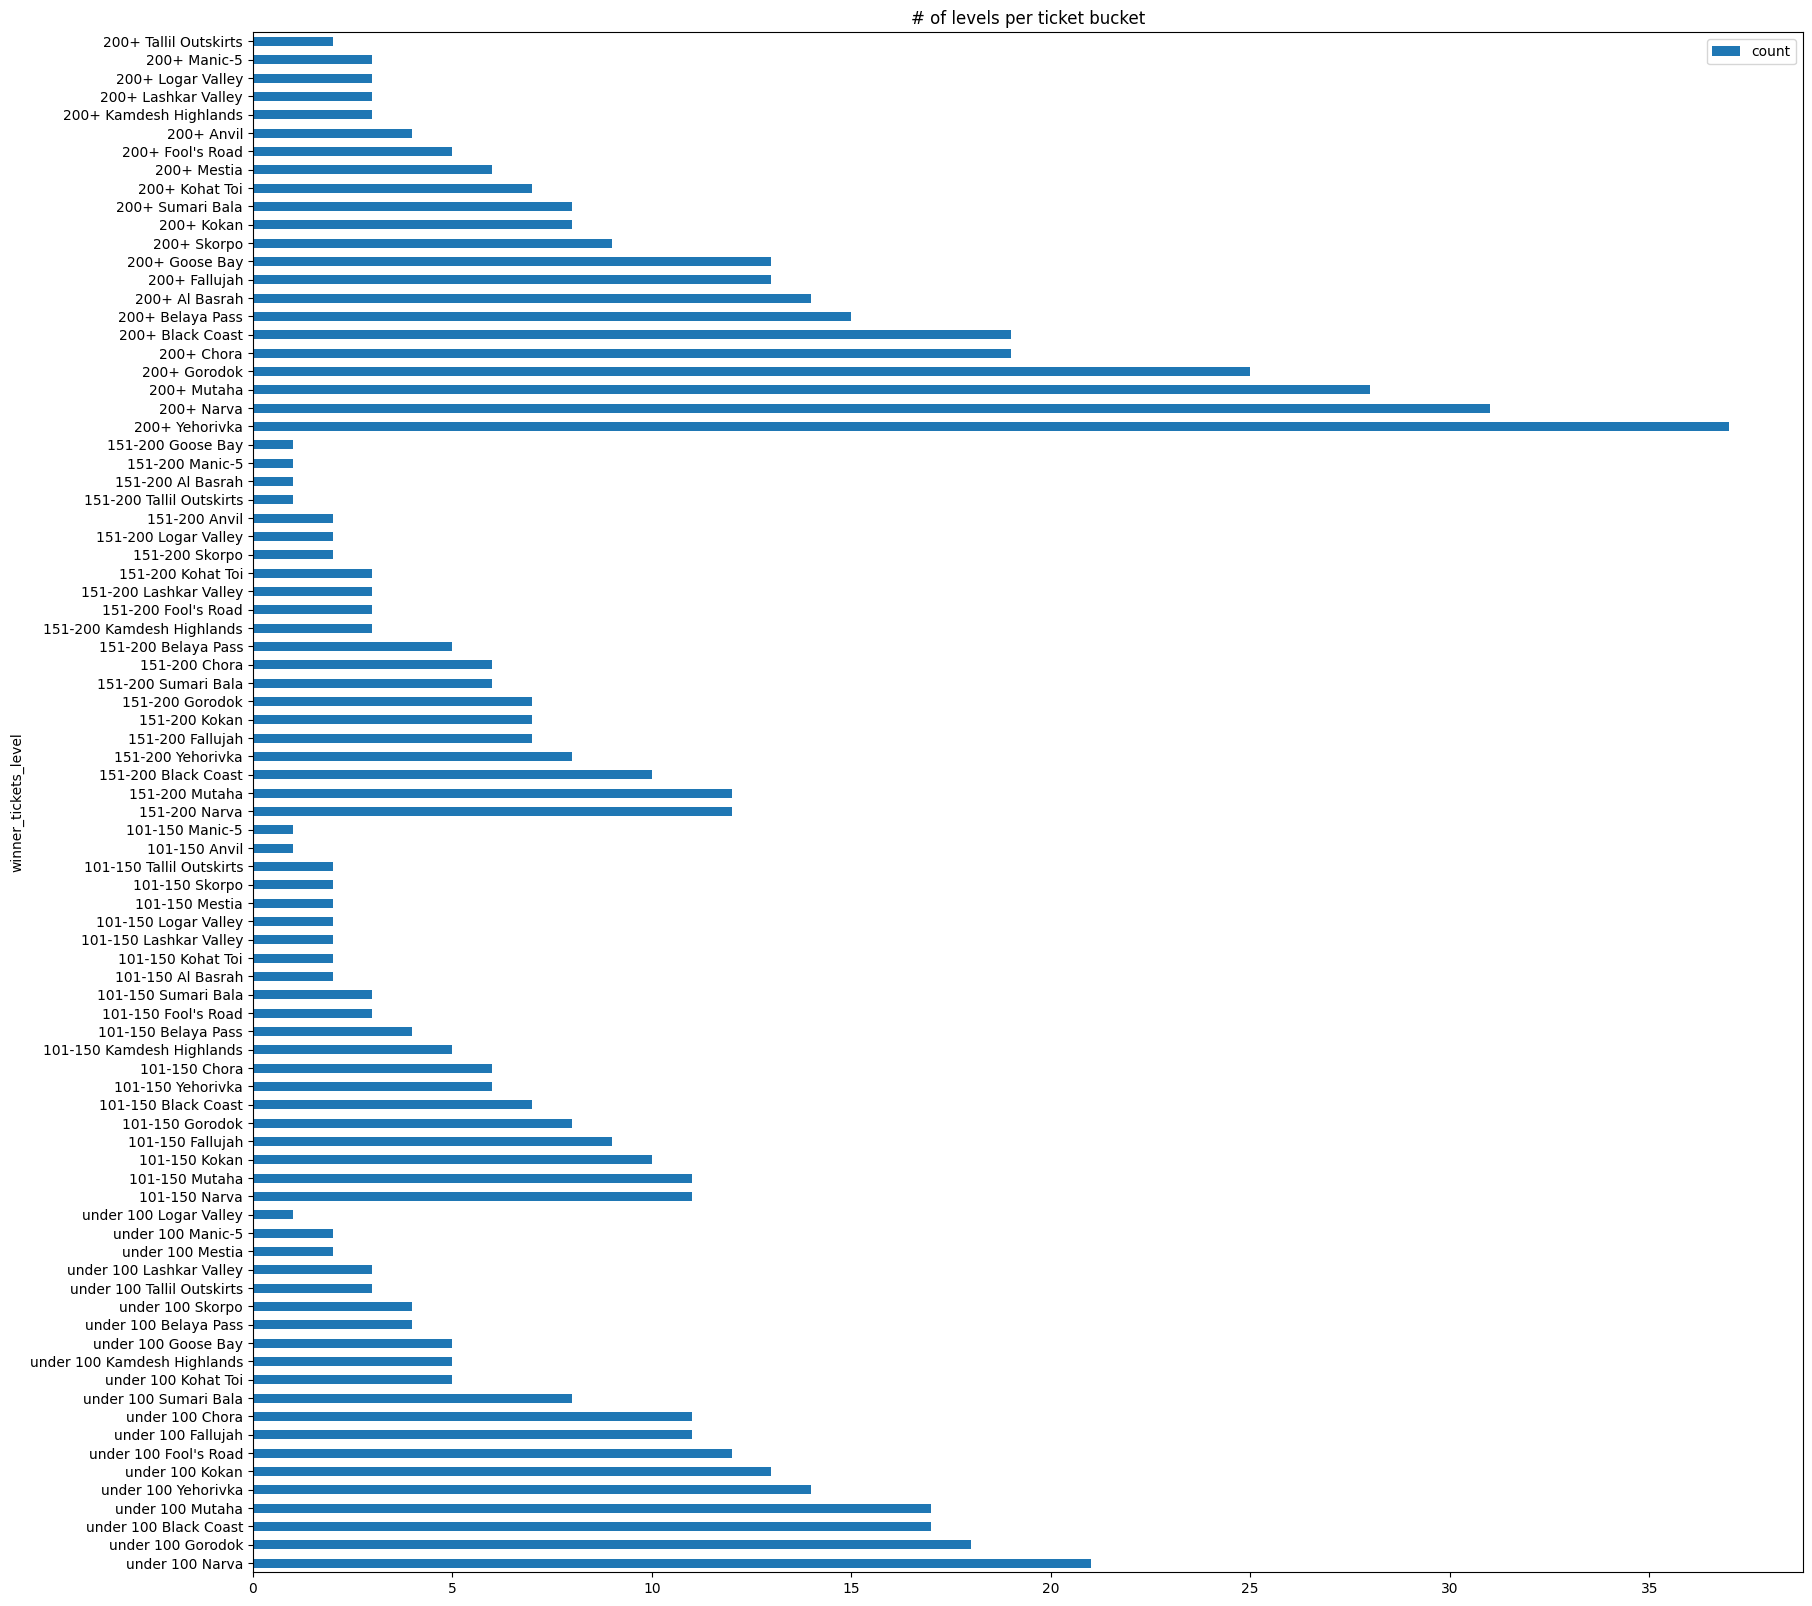

In [259]:
num_per_winner_ticket_bucket(df, 'level', '# of levels per ticket bucket', (20, 20))

In [260]:
# average winner tickets for each mode/layer/level

def average_winner_tickets(df, column, title):
    df = df.groupby([column])['winner_tickets'].mean()
    df.plot(kind='barh', figsize=(10, 5))


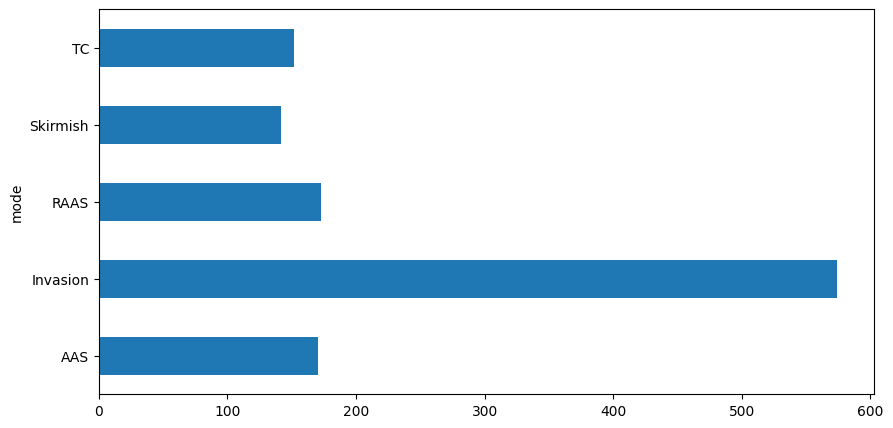

In [261]:
average_winner_tickets(df, 'mode', 'Average winner_tickets for modes')

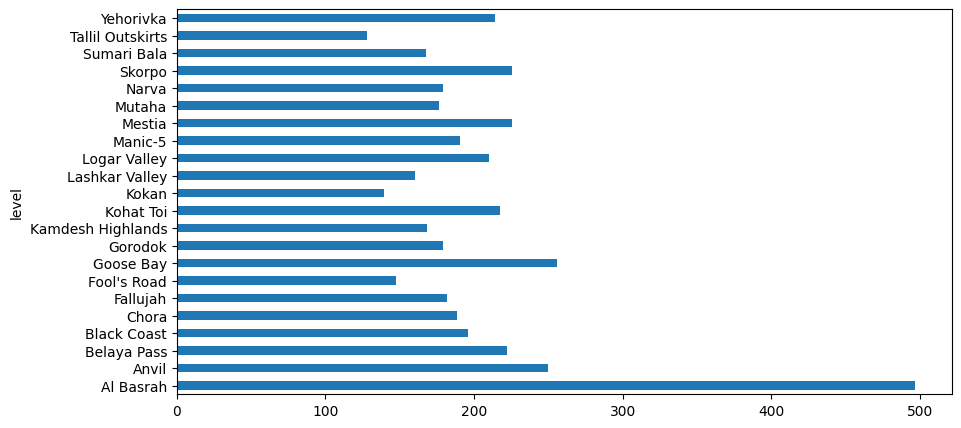

In [262]:
average_winner_tickets(df, 'level', 'Average winner_tickets for levels')